In [220]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [221]:
data = pd.read_csv('1Datasets/BTC-Daily.csv')
btc = dataset_train.iloc[:, 3:4].values

In [222]:
btc = btc[::-1]

In [223]:
btc

array([[  363.59],
       [  376.42],
       [  376.57],
       ...,
       [39146.66],
       [37717.1 ],
       [43221.71]])

In [224]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
btc = sc.fit_transform(btc)

In [225]:
btc = np.reshape(btc, (btc.shape[0], btc.shape[1], 1))

In [226]:
X_train = []
y_train = []
for i in range(60, len(btc)):
    X_train.append(btc[i-60:i, 0])
    y_train.append(btc[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [235]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)

In [236]:
model = keras.saving.load_model("snpLSTM.keras")

In [237]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [238]:
pre = model.predict(X_test)

9/9 [==============================] - 2s 19ms/step


In [239]:
pre = sc.inverse_transform(pre)

In [240]:
y_test = y_test.reshape(-1, 1)

In [241]:
y_test = sc.inverse_transform(y_test)

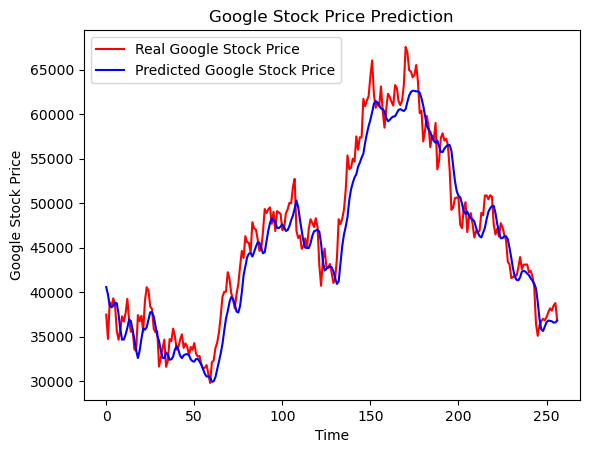

In [242]:
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(pre, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()